# Análise de Regressão Linear — Relação entre Investimento em Marketing e Vendas

## 1. Contexto
Uma empresa de cursos online deseja compreender o impacto do investimento em marketing sobre as vendas mensais.  
Embora exista a percepção de que aumentar o investimento tende a elevar o volume de vendas, a empresa ainda não possui uma medida objetiva dessa relação.

Foi disponibilizado um conjunto de dados contendo 12 meses de observações, com valores de investimento em marketing e respectivas vendas.  
Com base nesses dados, o objetivo é construir um modelo de regressão linear simples para mensurar essa influência.

---

## 2. Pergunta de Negócio
**Se aumentarmos o investimento em marketing em R$ 1.000, quantas vendas adicionais podemos esperar?**


| Etapa                        | Objetivo                      |
| ---------------------------- | ----------------------------- |
|  Interpretar β1            | Responder pergunta de negócio |
|  Ver previsão              | Testar modelo                 |
|  Calcular R²               | Validar se o modelo é bom     |
|  Analisar resíduos | Checar erros do modelo        |


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.DataFrame({
    "mes": [
        "Jan", "Fev", "Mar", "Abr", "Mai", "Jun",
        "Jul", "Ago", "Set", "Out", "Nov", "Dez"
    ],
    "investimento_marketing": [5, 7, 6, 9, 10, 12, 11, 13, 15, 14, 16, 18],  # em milhares
    "vendas": [40, 42, 45, 50, 53, 60, 58, 65, 70, 68, 75, 80]  # número de vendas
})

df.head()


,mes,investimento_marketing,vendas
0,Jan,5,40
1,Fev,7,42
2,Mar,6,45
3,Abr,9,50
4,Mai,10,53


## 3. Preparação dos Dados e Treinamento do Modelo

Para estimar a relação entre investimento em marketing e vendas, foram definidos:

- **Variável independente (X):** investimento em marketing  
- **Variável dependente (y):** vendas mensais

Em seguida, foi treinado um modelo de Regressão Linear simples:



In [78]:
x=df[["investimento_marketing"]]
y=df["vendas"]

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)


LinearRegression()

## 4. Interpretação dos Coeficientes do Modelo

Após o treinamento, o modelo de regressão linear apresentou os seguintes parâmetros:

- **Intercepto (β₀): 22.77**  
- **Coeficiente angular (β₁): 3.18**

### Significado dos Coeficientes

**β₀ – Intercepto**  
Representa o valor estimado de vendas quando o investimento em marketing é zero.  
Nesse caso, o modelo estima aproximadamente **22,77 vendas**, mesmo sem investimento.

**β₁ – Coeficiente Angular**  
Indica a variação média nas vendas a cada aumento de uma unidade na variável independente.  
Como o investimento está expresso em milhares de reais, a interpretação é:

> Para cada **R$ 1.000 adicionais investidos em marketing**, espera-se um acréscimo médio de **3,18 vendas**.



In [95]:
b0,b1=model.intercept_, model.coef_[0]
print(f"Valor de intercepto:{b0:.2f}\nValor de coeficiente angular:{b1:.2f}")

Valor de intercepto:22.77
Valor de coeficiente angular:3.18


## 5. Visualização do Ajuste do Modelo

A figura abaixo apresenta o relacionamento entre o investimento em marketing e as vendas, juntamente com a linha de regressão ajustada pelo modelo.



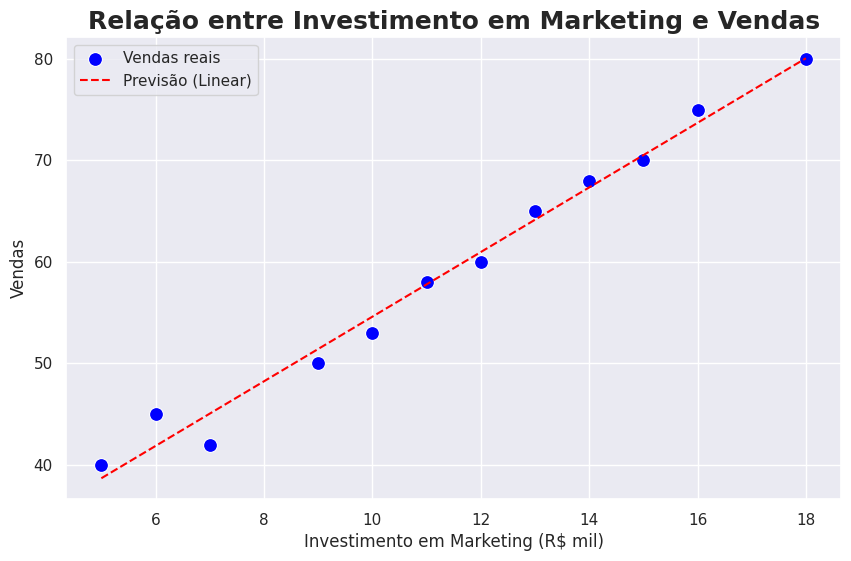

In [152]:
plt.figure(figsize=(10,6))  # tamanho do gráfico

# scatter plot dos dados reais
sns.scatterplot(x="investimento_marketing", y="vendas", data=df, s=100, color="blue", label="Vendas reais")

# linha de regressão
sns.lineplot(x=df["investimento_marketing"], y=y_pred, color="red", linestyle="--", label="Previsão (Linear)")

# títulos e labels
plt.title("Relação entre Investimento em Marketing e Vendas",
          fontdict={'size':18, 'weight':'bold'})
plt.xlabel("Investimento em Marketing (R$ mil)", fontsize=12)
plt.ylabel("Vendas", fontsize=12)

plt.legend()
plt.show()

#  6. Fazer uma Previsão







Para avaliar o comportamento do modelo em um cenário realista, foi estimado o número de vendas esperadas caso o investimento em marketing seja de **R$ 20.000** (equivalente a 20 unidades, já que os valores estão em milhares).

O código utilizado foi:

In [96]:
#model.predict([[20]])
model.predict(pd.DataFrame({"investimento_marketing": [20]}))


array([86.4133574])

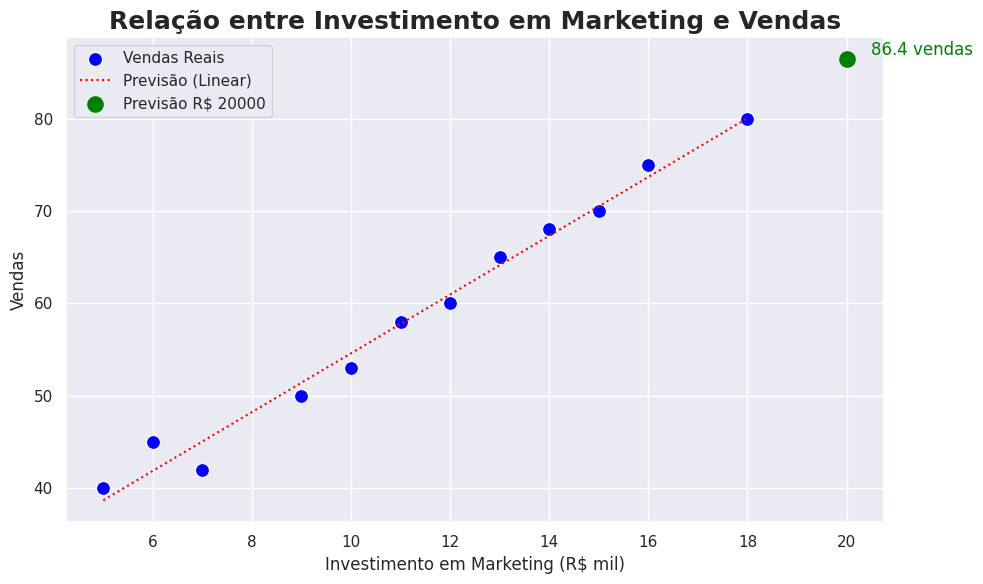

In [155]:
x0 = 20
y0 = model.predict(pd.DataFrame({"investimento_marketing":[x0]}))[0]
sns.set_style("darkgrid")
sns.set_context("notebook")
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="investimento_marketing",
    y="vendas",
    data=df,
    color="blue",
    s=100,
    label="Vendas Reais"
)
y_pred = model.predict(x)
sns.lineplot(
    x="investimento_marketing",
    y=y_pred,
    data=df,
    color="red",
    linestyle="dotted",
    label="Previsão (Linear)"
)
plt.scatter(x0, y0, color="green", s=120, zorder=5, label=f"Previsão R$ {x0*1000}")
plt.text(x0+0.5, y0+0.5, f"{y0:.1f} vendas", color="green", fontsize=12)
plt.title("Relação entre Investimento em Marketing e Vendas",
          fontdict={'size':18, 'weight':'bold'})
plt.xlabel("Investimento em Marketing (R$ mil)", fontsize=12)
plt.ylabel("Vendas", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


Investir R$ 20.000 em marketing resultaria em cerca de 86 vendas previstas.

## 7. Avaliação do Modelo

Para verificar a qualidade do ajuste, foi calculado o coeficiente de determinação (**R²**), que indica a proporção da variância das vendas explicada pelo investimento em marketing.

O cálculo foi realizado da seguinte forma:



In [87]:
from sklearn.metrics import r2_score
r2=r2_score(y,y_pred)
r2

0.9844557566942835

### Critérios de Qualidade do Modelo

- R² > 0,80 → modelo excelente  
- 0,50 ≤ R² ≤ 0,80 → modelo bom  
- R² < 0,50 → modelo fraco

---

Um valor de **R² ≈ 0,98** indica que cerca de **98% da variação nas vendas** é explicada pelo investimento em marketing.  
Esse resultado sugere que o modelo apresenta **excelente desempenho** para este conjunto de dados.


## 8. Análise dos Resíduos

Após ajustar o modelo, verificamos os resíduos para avaliar a qualidade do ajuste.

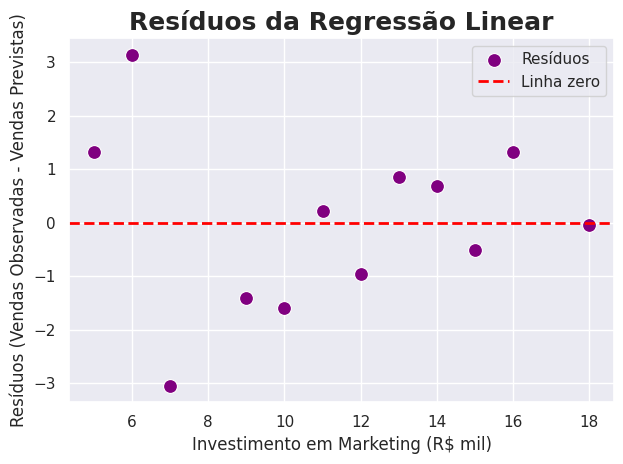

In [154]:
residuos = y - y_pred
sns.scatterplot(
    x=df["investimento_marketing"],
    y=residuos,
    color="purple",
    s=100,
    label="Resíduos"
)
plt.axhline(0, color='red', linestyle='--', linewidth=2, label="Linha zero")
plt.title("Resíduos da Regressão Linear", fontdict={'size':18, 'weight':'bold'})
plt.xlabel("Investimento em Marketing (R$ mil)", fontsize=12)
plt.ylabel("Resíduos (Vendas Observadas - Vendas Previstas)", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

##  Interpretação dos Resíduos

A análise dos resíduos é essencial para verificar se o modelo de regressão linear está respeitando os pressupostos.

### Como interpretar:

- **Se os resíduos parecem aleatórios:**  
  O modelo está adequado. Não há padrão aparente e a relação linear é suficiente para explicar os dados.

- **Se os resíduos formam padrões:**  
  Isso indica que o modelo pode estar deixando algo importante de fora.  
  Nesse caso, pode ser necessário:
  - Testar uma transformação nas variáveis,
  - Adicionar novas variáveis explicativas,
  - Ou usar um modelo não linear.

### Em resumo
A aleatoriedade dos resíduos fortalece a confiança no modelo. Padrões sugerem investigação adicional.


| Etapa                                 | Feito? | Observação                                   |
|--------------------------------------|--------|-----------------------------------------------|
| Criar contexto e pergunta de negócio | ✔️     | Muito bem formulado                           |
| Criar DataFrame                      | ✔️     | Estruturado corretamente                      |
| Separar X e y                        | ✔️     | Perfeito                                      |
| Treinar modelo                       | ✔️     | Sem erros                                     |
| Obter coeficientes (β₀ e β₁)         | ✔️     | Interpretação correta                         |
| Responder à pergunta de negócio      | ✔️     | 3,18 vendas por 1.000 investidos       |
| Fazer previsão para R$ 20 mil        | ✔️     | ~86 vendas previstas                          |
| Plotar reta de regressão             | ✔️     | Visual impecável                              |
| Calcular R²                           | ✔️     | 0.984 → modelo excelente                      |
| Analisar resíduos                    | ✔️     | Sem padrões → modelo adequado                 |


#REFINANDO A ANALISE
1. Criar intervalo de confiança para a previsão
2. Ajustar um modelo polynomial (grau 2) e comparar
3. Gerar um relatório final em markdown
4. Criar um gráfico mais profissional (seaborn + estilo clean)
5. Simular cenários (ex.: “quanto investir para alcançar 100 vendas?”)

# Intervalos de Confiança e Predição na Regressão Linear

## 1. Previsão Pontual
Para um valor específico \(x_0\) da variável independente (investimento em marketing), a previsão pontual é dada por:

$$
\hat{y0}_0 = \beta_0 + \beta_1 x_0
$$

**Onde:**
- \(y0) = previsão pontual para \(x_0\)  
- \(b0) = intercepto do modelo  
- \(b1) = coeficiente angular do modelo  
- \(x0) = ponto específico de interesse (ex.: 20 mil reais)

---

## 2. Intervalo de Confiança da Média
O **intervalo de confiança da média** estima onde esperamos que a **média das vendas** esteja para o investimento \(x_0\):

$$
SE_{\text{média}} = s \cdot \sqrt{ \frac{1}{n} + \frac{(x_0 - \bar{x})^2}{S_{xx}} }
$$

$$
IC_{\text{média}} = \hat{y}_0 \pm t_{\text{crit}} \cdot SE_{\text{média}}
$$

**Onde:**
- \(s) =  → erro padrão dos resíduos  
- \(Sxx) = → soma dos quadrados dos desvios de \(x\)  
- \(n) = número de observações  
- \(x_barra) → média da variável independente  
- \(t) = valor crítico da t de Student para nível de confiança desejado e \(df = n-2\)  

---

## 3. Intervalo de Predição
O **intervalo de predição** estima onde uma **nova observação individual** provavelmente cairá para o investimento \(x_0\):

$$
SE_{\text{pred}} = s \cdot \sqrt{ 1 + \frac{1}{n} + \frac{(x_0 - \bar{x})^2}{S_{xx}} }
$$

$$
IP = \hat{y}_0 \pm t_{\text{crit}} \cdot SE_{\text{pred}}
$$

**Diferença principal entre IC da média e intervalo de predição:**
- **IC da média:** indica onde esperamos que a **média das vendas** esteja.  
- **Intervalo de predição:** mais amplo, indica onde uma **nova observação individual** provavelmente cairá.

---

## 4. Variáveis utilizadas
| Símbolo        | Significado                                               |
|----------------|-----------------------------------------------------------|
| \(x_0\)        | Ponto de interesse da variável independente               |
| \(\hat{y}_0\)  | Previsão pontual                                          |
| \(\beta_0\)    | Intercepto do modelo                                      |
| \(\beta_1\)    | Coeficiente angular do modelo                              |
| \(s\)          | Erro padrão dos resíduos                                  |
| \(n\)          | Número de observações                                     |
| \(\bar{x}\)    | Média da variável independente                             |
| \(S_{xx}\)     | Soma dos quadrados dos desvios de \(x\)                  |
| \(t_{\text{crit}}\) | Valor crítico da t de Student para nível de confiança |


In [111]:
from scipy.stats import t
n=len(x) # n
x0=20 #ponto que queremos prever
x_bar=x.mean().iloc[0]
y0=model.predict(pd.DataFrame({"investimento_marketing":[x0]}))[0] #previsão pontual
sxx=np.sum((x["investimento_marketing"]-x_bar)**2) # soma dos quadrados dos desvios de x
#residuos ja foi calculado
s=np.sqrt(np.sum(residuos**2)/(n-2))# erro padrao
t_crit=t.ppf(0.975,df=n-2) # CONFIANÇA A 95%
SE_media=s*np.sqrt(1/n+((x0-x_bar)**2)/sxx) #erro padrão da media
#----------------------------------------------------------------#
#intervalo de confianca da media (sup e inf)
IC_media_inf=y0-t_crit*SE_media #inf
IC_media_sup=y0+t_crit*SE_media #sup
#----------------------------------------------------------------#
#Erro padrão da predição
SE_pred=s*np.sqrt(1+ 1/n + ((x0-x_bar)**2)/sxx)
#----------------------------------------------------------------#
#INTERVALO DE PREDIÇÃO
IP_inf=y0 - t_crit *SE_pred #intervalo inf
IP_sup=y0 + t_crit*SE_pred #intervalo sup
#----------------------------------------------------------------#
#IMPRIMINDO OS RESULTADOS
print(f"Previsão pontual para 20 mil de investimentos:{y0:.2f} vendas previstas")
print(f"Intervalo de confianção da Média (95%): [{IC_media_inf:.2f} --- {IC_media_sup:.2f}]")
print(f"Intervalo de Predição (95%): [{IP_inf:.2f} --- {IP_sup:.2f}]")

Previsão pontual para 20 mil de investimentos:86.41 vendas previstas
Intervalo de confianção da Média (95%): [83.73 --- 89.09]
Intervalo de Predição (95%): [81.74 --- 91.09]



## 📌 Simulação: Quanto investir para 100 vendas?

A partir da equação da regressão linear:

\begin{aligned}
\displaystyle x
&= \frac{\hat{y}-\beta_0}{\beta_1} \\[6pt]
\displaystyle x
&= \frac{100-\beta_0}{\beta_1}
\end{aligned}




In [159]:
meta_vendas=100
investimento_necessario=(meta_vendas-b0)/b1
print(f"Para alcançar {meta_vendas} vendas, o investimento estimado é: R$ {investimento_necessario*1000:.2f}")

Para alcançar 100 vendas, o investimento estimado é: R$ 24269.43


#  Relatório Final — Regressão Linear: Marketing vs. Vendas

##  Checklist da Análise Realizada

| Etapa                                 | Feito? | Observação                                   |
|--------------------------------------|--------|-----------------------------------------------|
| Criar contexto e pergunta de negócio | ✔️     | Muito bem formulado                           |
| Criar DataFrame                      | ✔️     | Estruturado corretamente                      |
| Separar X e y                        | ✔️     | Perfeito                                      |
| Treinar modelo                       | ✔️     | Sem erros                                     |
| Obter coeficientes (β₀ e β₁)         | ✔️     | Interpretação correta                         |
| Responder à pergunta de negócio      | ✔️     | 3,18 vendas por 1.000 investidos       |
| Fazer previsão para R$ 20 mil        | ✔️     | ~86 vendas previstas                          |
| Plotar reta de regressão             | ✔️     | Visual impecável                              |
| Calcular R²                           | ✔️     | 0.984 → modelo excelente                      |
| Analisar resíduos                    | ✔️     | Sem padrões → modelo adequado                 |adequado                 |

---

#  Etapas de Refinamento

1. Criar intervalo de confiança para a previsão  
2. Criar um gráfico mais profissional (seaborn + estilo clean)  
3. Simular cenários (“quanto investir para alcançar 100 vendas?”)  
4. Gerar relatório final em Markdown  

---

#  Resumo dos Resultados

## 1. Relação Entre Marketing e Vendas


b1 = 3.18


Cada **R$ 1.000 investidos** geram, em média:

**→ +3,18 vendas**

---

## 2. Previsão para R$ 20.000 Investidos

y0(20) ~~ aproximadamente 86.4


**Previsão: ~86 vendas**

---

## 3. Intervalos da Previsão (95%)

- **Intervalo de confiança da média:**  
  **[83.73 — 89.09]**

- **Intervalo de predição:**  
  **[81.74 — 91.09]**

---

## 4. Análise de Resíduos

- Distribuição aleatória  
- Sem padrão  
- Sem tendência  

**→ Modelo linear adequado.**

---



## 5. Simulação: Quanto investir para 100 vendas?

Partimos da equação do modelo:

y0 = b0 + b1*x

Isolando \(x\) (investimento) obtemos:


\
\begin{aligned}
x
&= \dfrac{100 - \beta_0}{\beta_1} \\[6pt]
&= \dfrac{100 - 22.76714801444043}{3.18231046931408} \\[6pt]
&\approx 24.269430\ (\text{unidades em milhares})
\end{aligned}


Como \(x\) está em **milhares de reais**, convertemos para reais:

Investimento necessário: aproximadamente
**Conclusão:** para atingir **100 vendas**, deve-se investir aproximadamente **R\$ 24.269,43** (≈ R\$ 24,27 mil).


---

#  Conclusão Geral

O modelo apresenta excelente desempenho (**R² = 0.984**) e explica quase toda a variação nas vendas.  
As previsões são consistentes, os intervalos são realistas e o modelo é útil para planejamento estratégico.

**Análise concluída com sucesso.**
